In [1]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import math

def showSolution(data,solution):
    
    # print the booking strategy
    print("Bookings:")
    for booking in solution['Bookings']:
        print(booking)

    # show the passes
    minVisiDuration = data['minVisiDuration']
    AOIs = data['AOIs']
    nAOIs = len(AOIs)
    accesses = data['Accesses']
    satPasses = data['Passes']
    nPasses = len(satPasses)
    
    ncols = 3
    nrows = math.ceil(nPasses / ncols)
    proj = ccrs.PlateCarree()
    fig, axs = plt.subplots(nrows=nrows,ncols=ncols, subplot_kw={'projection': proj},figsize=(30,80))
    axs = axs.flatten()

    for i in range(nPasses):
        satPass = satPasses[i]
        ax = axs[i]
        ax.set_extent([-15, 25, 35, 60])
        ax.stock_img()
        ax.add_feature(cf.COASTLINE, lw=1)
        ax.add_feature(cf.BORDERS)
        #plt.gcf().set_size_inches(15, 15)    
        for aoi in  AOIs:
            ax.plot([aoi['lon']], [aoi['lat']], 'kx')
        ax.set_title("Pass #{} [{},{}]".format(i,satPass['startDate'],satPass['endDate']))
    
        booking = None
        for bk in solution['Bookings']:
            if bk['passId'] == i:
                booking = bk            
                break
        
        for accessId in satPass['accessIds']:
            access = accesses[accessId]
            aoi = AOIs[access['aoiId']]            
            ax.plot([aoi['lon']], [aoi['lat']], 'rx')
            # show the reservations
            if (booking != None) and (booking['bookingStart'] <= access['end'] - minVisiDuration) and (access['start'] + minVisiDuration <= booking['bookingEnd']):
                ax.plot([aoi['lon']], [aoi['lat']], 'bo')

    plt.show()

In [2]:
import random
import json

# import the data

dataFile = open('data/data12.json')  
data = json.load(dataFile)
accesses = data['Accesses']
obsRequests = data['ObservationRequests'];
nObsRequests = len(obsRequests)
covered = [False for i in range(nObsRequests)]
nObsRequestsToCover = nObsRequests
satPasses = data['Passes'];
nPasses = len(satPasses)

# a very basic solver

remainingSatPassesIds = list(range(nPasses))
random.shuffle(remainingSatPassesIds)
selectedPassIds = []
for i in remainingSatPassesIds:
    # try to select the ith path
    satPass = satPasses[i]
    keepPass = False
    for accessId in satPass['accessIds']:
        access = accesses[accessId]
        for j in range(nObsRequests):
            obsRequest = obsRequests[j]
            if not covered[j] and accessId in obsRequest['accessIds']:
                covered[j] = True
                keepPass = True
                nObsRequestsToCover -= 1
                
    if keepPass:
        selectedPassIds.append(i)
            
    if nObsRequestsToCover == 0:
        break


print(selectedPassIds)
print(len(selectedPassIds))

# export the solution to json
bookings = []
for i in selectedPassIds:
    satPass = satPasses[i]
    bookings.append({"passId": i, "passStart": satPass['start'], "passEnd": satPass['end'], "bookingStart": satPass['start'], "bookingEnd": satPass['end']})
jsonString = json.dumps({"Bookings": bookings})
jsonFile = open("mySolution.json", "w")
jsonFile.write(jsonString)
jsonFile.close()


[44, 26, 66, 52, 9, 15, 2, 30]
8


Bookings:
{'passId': 44, 'passStart': 29196, 'passEnd': 29268, 'bookingStart': 29196, 'bookingEnd': 29268}
{'passId': 26, 'passStart': 17649, 'passEnd': 17994, 'bookingStart': 17649, 'bookingEnd': 17994}
{'passId': 66, 'passStart': 41390, 'passEnd': 41725, 'bookingStart': 41390, 'bookingEnd': 41725}
{'passId': 52, 'passStart': 33945, 'passEnd': 33991, 'bookingStart': 33945, 'bookingEnd': 33991}
{'passId': 9, 'passStart': 5777, 'passEnd': 6101, 'bookingStart': 5777, 'bookingEnd': 6101}
{'passId': 15, 'passStart': 9657, 'passEnd': 9904, 'bookingStart': 9657, 'bookingEnd': 9904}
{'passId': 2, 'passStart': 1104, 'passEnd': 1449, 'bookingStart': 1104, 'bookingEnd': 1449}
{'passId': 30, 'passStart': 20266, 'passEnd': 20500, 'bookingStart': 20266, 'bookingEnd': 20500}


c:\Users\victo\anaconda3\envs\cos2022\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
c:\Users\victo\anaconda3\envs\cos2022\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


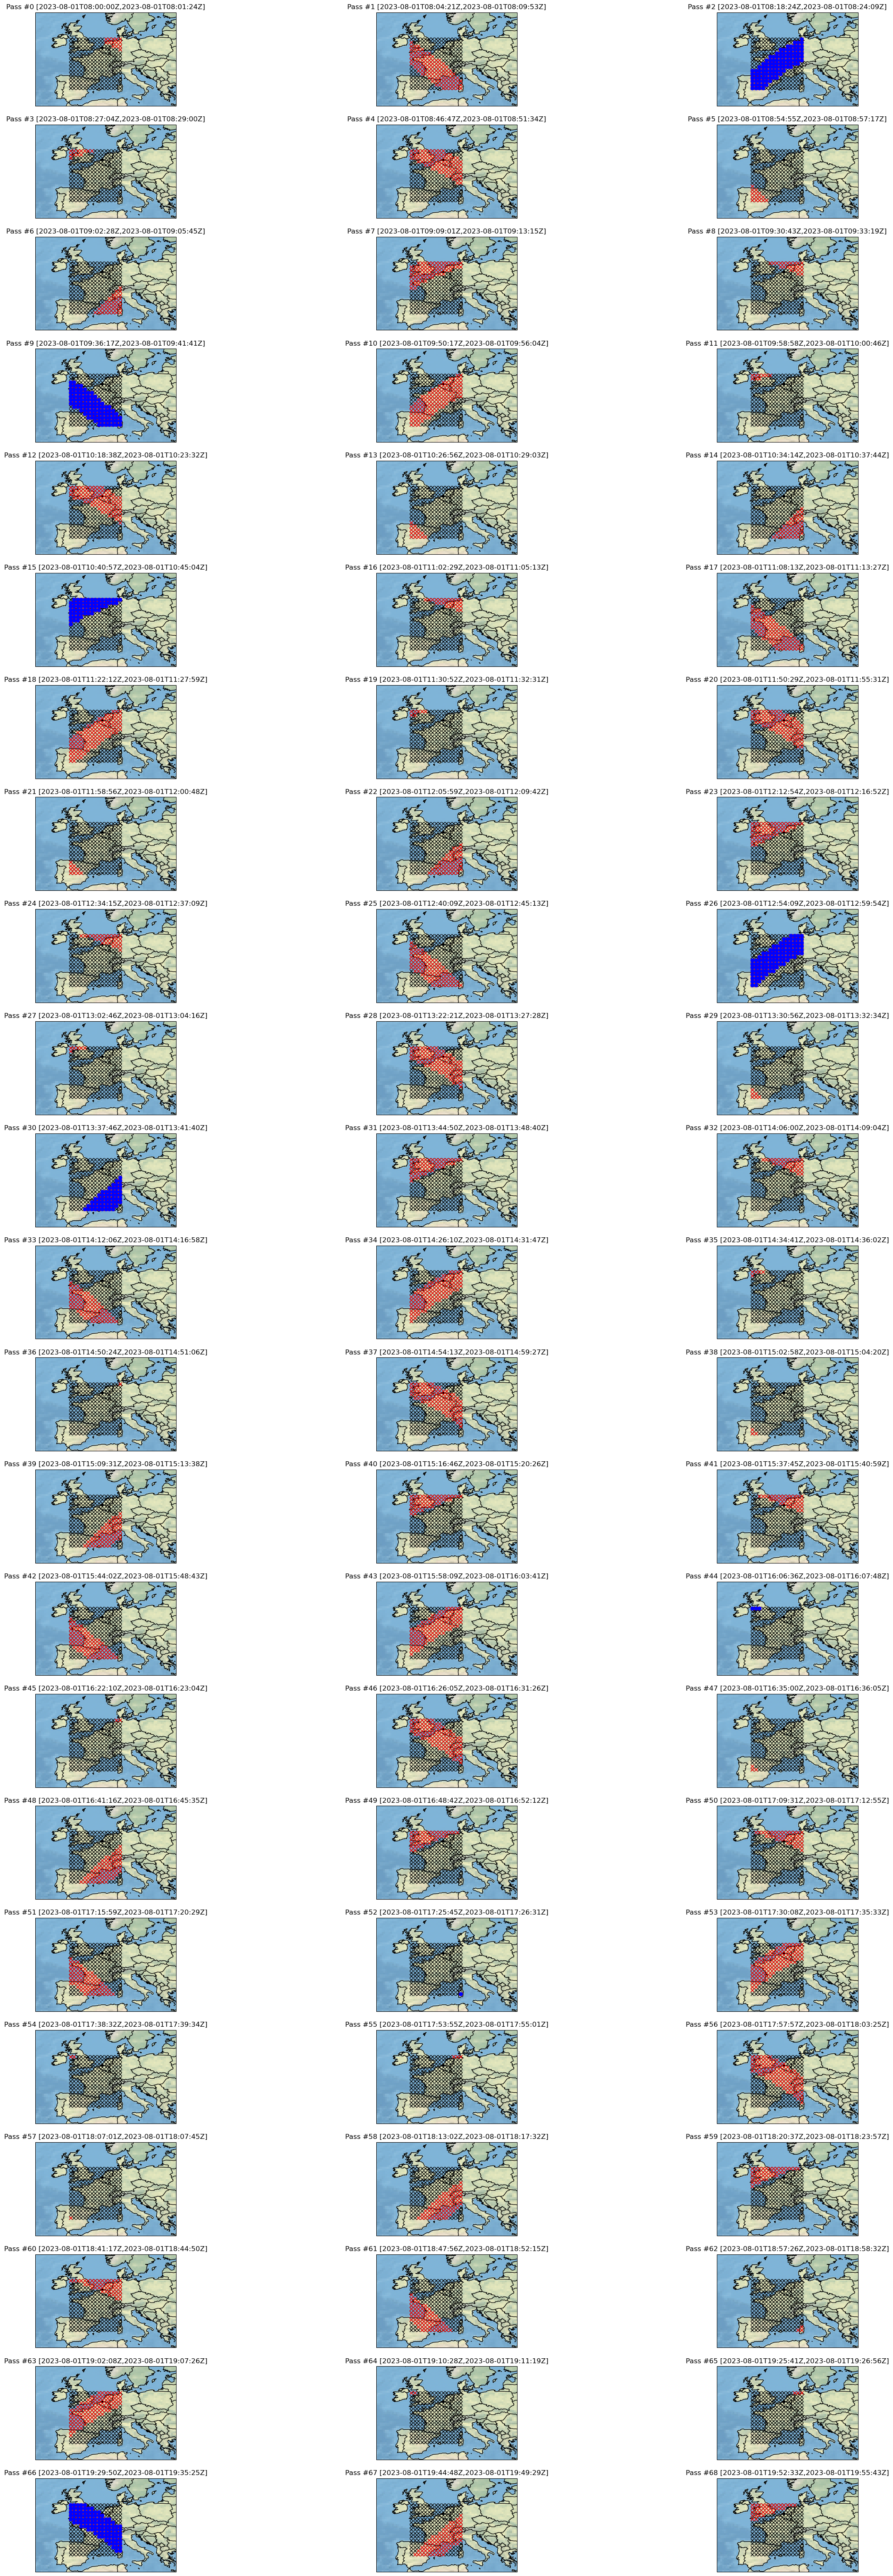

In [3]:
# import the solution
solutionFile = open('mySolution.json')  
solution = json.load(solutionFile)

showSolution(data,solution)